## Esercizio 1

Exercise: Create a dataframe of at least 1000 rows about an hypothetical list of employees of your company, extract all employees in the IT department and a Salary greater than 55000.



In [5]:
# Tool preps
import pandas as pd
import numpy as np

In [13]:
# imposto il seme per riprodurre sempre gli stessi valori
np.random.seed(42)
n = 1000

#Genero dei nomi
names = [f"Employee_{i}" for i in range(n)]  # Nomi ipotetici
# Assegno casualmente un dipartimento tra quelli nell'array
departments = np.random.choice(["IT", "HR", "Marketing", "Finance", "Operations"], n) 

#Genero delle età randomiche
ages = np.random.randint(20,60,n)
# Genero delle ral per randomiche tra i valori specificati
ral = np.random.randint(28000, 70000, n)

#  Creo il data frame passando un dizionaro, che avrà il nome colonna delle chiavi, e come valori i singoli elementi di ogni lista
df = pd.DataFrame({
    "Name": names,
    "Age": ages,
    "Department": departments,
    "Salary": ral
})

df.head()

,Name,Age,Department,Salary
0,Employee_0,31,Finance,45625
1,Employee_1,55,Operations,61893
2,Employee_2,23,Marketing,38793
3,Employee_3,24,Operations,59007
4,Employee_4,56,Operations,53766


In [19]:
# Creo un nuovo dataframe filtrato per dipartimento e ral
filtered_df=df[(df["Department"] == "IT") & (df["Salary"] > 55000)]

filtered_df

,Name,Age,Department,Salary
24,Employee_24,40,IT,68747
38,Employee_38,53,IT,56982
55,Employee_55,39,IT,69323
86,Employee_86,22,IT,64875
87,Employee_87,51,IT,59982
...,...,...,...,...
876,Employee_876,28,IT,68197
896,Employee_896,40,IT,58519
913,Employee_913,48,IT,55005
937,Employee_937,23,IT,65383


## Esercizio 2
Exercise: Create a column to split the data in Low, Medium, High fare prices and calculate the average Age per each section. Fill the Age set to nan and calculate the average age again, how did it change? How can you fill the age so that the average does not change?

In [22]:
# Importo i dati creando un nuovo data frame
df_tit = pd.read_csv("data/titanic.csv")
df_tit.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [67]:
# Voglio capire da quanto a quanto variano i prezzi dei biglietti, per creare dei bin proporzionati
# non tanto per il loro numero ma per il loro prezzo
print(df_tit["Fare"].min(), df_tit["Fare"].max())
print(df_tit["Fare"].describe())

0.0 512.3292
count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64


In [79]:
# Per creare i bin e dividere nelle 3 fasce di prezzo posso usare i 3 quartili
# Creiamo i bin basati sui quartili, e farò in modo che:
# Low va da prezzo minimo a primo quartile
# Medium va da primo quartile al terzo quartile
# High va dal terzo quartile al valore massimo
bins = [df_tit['Fare'].min(), df_tit['Fare'].quantile(0.25), df_tit['Fare'].quantile(0.75), df_tit['Fare'].max()]
labels = ['Low', 'Medium', 'High']

df_tit['Fare_Category'] = pd.cut(df_tit['Fare'], bins=bins, labels=labels, include_lowest=True)

print(df_tit[['Fare', 'Fare_Category']])

print("\nRange di Prezzo per ciascuna categoria:")
for i, label in enumerate(labels):
    start = bins[i]
    end = bins[i+1]
    print(f"{label}: {start:.2f} - {end:.2f}")

        Fare Fare_Category
0     7.2500           Low
1    71.2833          High
2     7.9250        Medium
3    53.1000          High
4     8.0500        Medium
..       ...           ...
886  13.0000        Medium
887  30.0000        Medium
888  23.4500        Medium
889  30.0000        Medium
890   7.7500           Low

[891 rows x 2 columns]

Range di Prezzo per ciascuna categoria:
Low: 0.00 - 7.91
Medium: 7.91 - 31.00
High: 31.00 - 512.33


In [37]:
# Controllo la distribuzione dei bin
print(df_tit["Fare_Category"].value_counts())

Medium    446
Low       223
High      222
Name: Fare_Category, dtype: int64


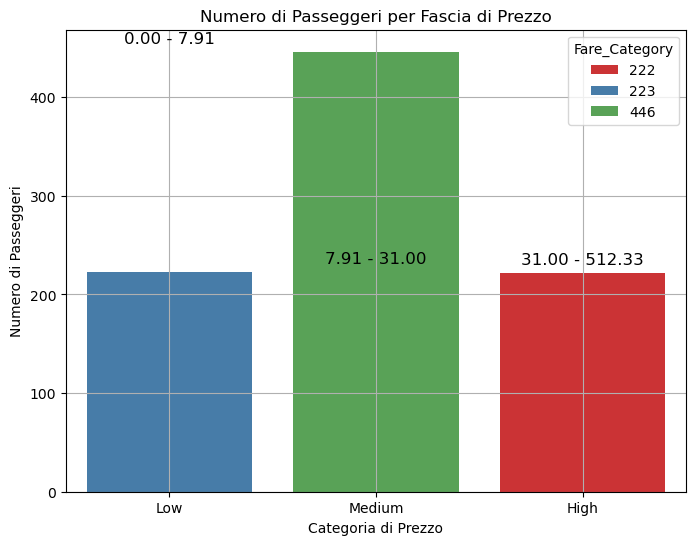

In [85]:
# Lo mostro graficamente
import matplotlib.pyplot as plt
import seaborn as sns

# Calcolare il numero di valori in ciascuna fascia
fare_category_counts = df_tit['Fare_Category'].value_counts()

# Creare un grafico a barre per visualizzare le frequenze per ciascuna fascia di prezzo
plt.figure(figsize=(8, 6))

# Creiamo un grafico a barre
sns.barplot(x=fare_category_counts.index, y=fare_category_counts.values, palette='Set1', hue=fare_category_counts)

# Aggiungi titolo e etichette
plt.title('Numero di Passeggeri per Fascia di Prezzo')
plt.xlabel('Categoria di Prezzo')
plt.ylabel('Numero di Passeggeri')
plt.grid(True)

# Aggiungi le etichette per i range di ciascuna fascia
for i, label in enumerate(fare_category_counts.index):
    start = bins[i]
    end = bins[i + 1]
    plt.text(i, fare_category_counts.values[i] + 5, f'{start:.2f} - {end:.2f}', 
             horizontalalignment='center', verticalalignment='bottom', fontsize=12, color='black')

# Mostriamo il grafico
plt.show()


In [38]:
mean_age_for_fare_cat = df_tit.groupby("Fare_Category")["Age"].mean()
print(mean_age_for_fare_cat)

Fare_Category
Low       28.328671
Medium    29.035146
High      31.999588
Name: Age, dtype: float64


In [39]:
# controllo quanti sono i valori vuoti di AGE
df_tit["Age"].isna().sum()

177

In [41]:
# controllo come varia l'età
df_tit["Age"].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [45]:
# creo un nuovo dataframe che riempie randomicamente l'età, con un range randomico da 0.4 a 80 (min-max)
min_max_age = df_tit["Age"].agg([min,max])
print(min_max_age)

min     0.42
max    80.00
Name: Age, dtype: float64


In [57]:
# prendo i valori assegnandoli alle variabili per usarle nel range
min_age = min_max_age["min"]
max_age = min_max_age["max"]

# definisco una funzione per generare i valori randomici
def random_age(row):
    return np.random.randint(min_age, max_age + 1)
    
# creo una copia del dataframe
df_tit_random_age = df_tit.copy()
# Faccio il fill dei valori vuoti con quelli random
df_tit_random_age["Age"] = df_tit_random_age.apply(lambda row: random_age(row) if pd.isna(row["Age"]) else row["Age"], axis=1)

#vedo se ho riempito tutto
df_tit_random_age["Age"].isna().sum()

0

In [59]:
# Ricalcolo la media per il nuovo data frame
mean_age_for_fare_cat_random = df_tit_random_age.groupby("Fare_Category")["Age"].mean()
print(mean_age_for_fare_cat_random)

Fare_Category
Low       32.874439
Medium    30.621637
High      31.738378
Name: Age, dtype: float64


In [61]:
# Quella iniziale invece era
mean_age_for_fare_cat = df_tit.groupby("Fare_Category")["Age"].mean()
print(mean_age_for_fare_cat)

Fare_Category
Low       28.328671
Medium    29.035146
High      31.999588
Name: Age, dtype: float64


In [65]:
# La media è cambiata, quindi posso provare invece di riempire in NaN di age randomicamente, userò il valore medio:
# creo una copia del dataframe
df_tit_fitted_mean_age = df_tit.copy()

# Faccio il fill dei valori vuoti con quelli random
df_tit_fitted_mean_age["Age"] = df_tit_fitted_mean_age["Age"].fillna(df_tit["Age"].mean())

In [66]:
# calcolo le nuove medie per vedere se non cambiano da quelle iniziali
df_tit_fitted_mean_age = df_tit_fitted_mean_age.groupby("Fare_Category")["Age"].mean()
print(df_tit_fitted_mean_age)

Fare_Category
Low       28.820311
Medium    29.137868
High      31.709438
Name: Age, dtype: float64


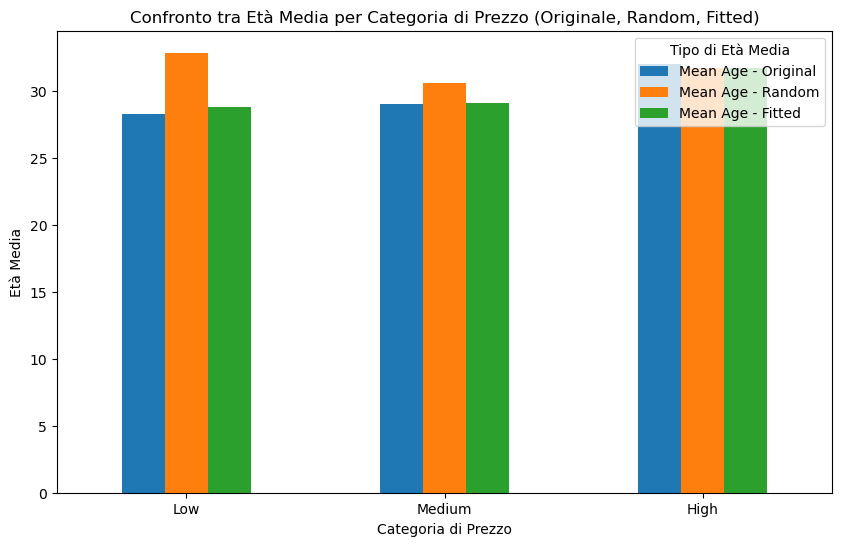

In [86]:
# Creazione di un DataFrame con le età medie per confronto
age_comparison = pd.DataFrame({
    'Category': mean_age_for_fare_cat.index,
    'Mean Age - Original': mean_age_for_fare_cat.values,
    'Mean Age - Random': mean_age_for_fare_cat_random.values,
    'Mean Age - Fitted': df_tit_fitted_mean_age.values
})

# Plot del confronto tra età media per categoria
age_comparison.set_index('Category').plot(kind='bar', figsize=(10, 6))
plt.title('Confronto tra Età Media per Categoria di Prezzo (Originale, Random, Fitted)')
plt.ylabel('Età Media')
plt.xlabel('Categoria di Prezzo')
plt.xticks(rotation=0)
plt.legend(title="Tipo di Età Media")
plt.show()
